В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [1]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = [-2, -1, 0, 1, 2]

In [2]:
[sigmoid(x) for x in z]

[0.11920292202211755,
 0.2689414213699951,
 0.5,
 0.7310585786300049,
 0.8807970779778823]



#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [3]:
def hypothesis(theta, X):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

theta = np.array([0.5, -0.5])
X = np.array([[1, 2], [1, -1], [1, 0], [1, 1]])

In [4]:
hypothesis(theta, X)

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [5]:
y = [1, 0, 1, 0]

def gradient(theta, X, y):
    
    m = len(y)
    z = np.dot(X, theta) 
    h0_theta = 1 / (1 + np.exp(-z)) # гіпотеза логістичної регресії
    grad = (1 / m) * np.dot(X.T, (h0_theta - y))
    
    return grad

In [6]:
gradient(theta, X, y)

array([ 0.05776464, -0.36899431])


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [7]:
theta = [0.0, 0.0]
lr = 0.1
errors = []

def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):

    m = len(y)
    theta = np.zeros(X.shape[1])

    for _ in range(epochs):
        y_pred = 1 / (1 + np.exp(-np.dot(X, theta))) # функція гіпотези
        
        error = y_pred - y
        errors.append(np.sum(error)) # розрахунок помилки
        
        grad = (1 / m) * np.dot(X.T, (y_pred - y))  # розрахунок градієнта

        theta -= lr * grad

    return theta

In [8]:
errors = []
theta_predicted = full_batch_gradient_descent(X,y)
theta_predicted

array([-0.2893693 ,  0.77655125])

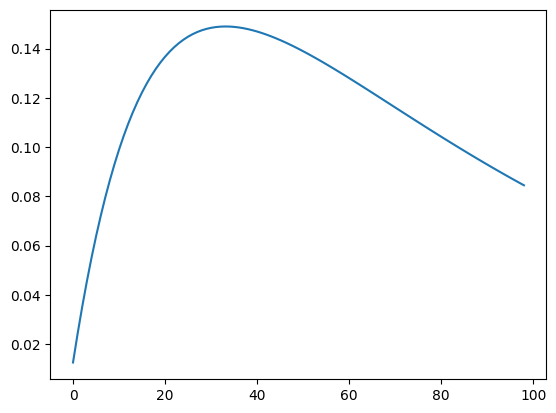

In [9]:
import matplotlib.pyplot as plt
plt.plot(errors[1:])

[-0.45409043  0.90818301]


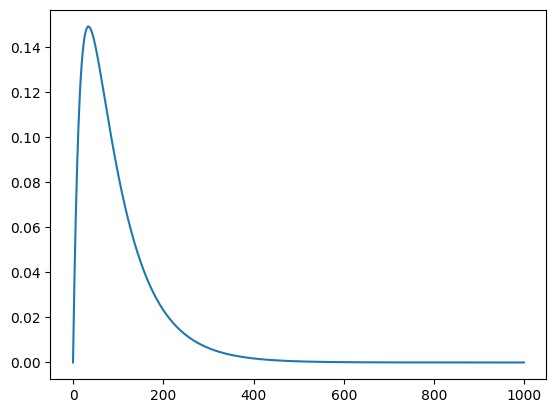

In [10]:
errors = []
theta_predicted = full_batch_gradient_descent(X, y, epochs=1000)
print(theta_predicted)

plt.plot(errors)
plt.show()

В даному випадку, кількість епох - **100** було недостатньо, оскільки модель недовчилась. На графіку помилок видно, що при **1000** епох, модель донавчилась значно краще, тому використаємо параметри ті, які були натреновані в результаті **1000** епох.

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [11]:
def predict_proba(theta, X):
    probs = 1 / (1 + np.exp(-np.dot(X, theta)))
    return probs

def predict(theta, X, threshold=0.5):
    probs = 1 / (1 + np.exp(-np.dot(X, theta)))
    predictions = [1 if x >= 0.5 else 0 for x in probs]
    return predictions


def accuracy(y_true, y_pred):
    if not isinstance(y_true, np.ndarray):
        y_true = np.array(y_true)
    elif not isinstance(y_pred, np.ndarray):
        y_pred = np.array(y_pred)

    value = np.sum(y_true == y_pred) / len(y)
    return np.round(100 * value, 2)

print("Передбачені ймовірності: {}".format(predict_proba(theta_predicted, X)))
print("Передбачені класи: {}".format(predict(theta_predicted, X)))
print("Дійсні класи: {}".format(y))
print("Точність моделі: {}%".format(accuracy(y, predict(theta_predicted, X))))

Передбачені ймовірності: [0.79612929 0.20387106 0.38838867 0.61161184]
Передбачені класи: [1, 0, 0, 1]
Дійсні класи: [1, 0, 1, 0]
Точність моделі: 50.0%
